<a href="https://colab.research.google.com/github/SirMacho2/sprite_sgdk_converter/blob/main/Sgdk_sprite_converter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Variaveis de entrada 
modifique as variaveis para cada sprites




*   **pasta_dos_sprites** = pasta onde vão estar as imagens de cada sprite
*   **arquivo_de_saida** = nome do arquivo de saída
*   **backgrauond color** = [r g b]
*   **numero_de_cores** = numero de cores da saida inclue o background
*   **limitar_cores** = marque para limitar a quantidade de cores





In [11]:
#@title Variaveis de entrada
pasta_dos_sprites = "/content/ryo_magia" #@param {type:"string"}
arquivo_de_saida = "ryo_magia" #@param {type:"string"}
background_color = [248, 0, 248] #@param {type:"raw"}
numero_de_cores =  5#@param {type:"integer"}
limitar_cores = True #@param {type:"boolean"}
# pasta_dos_sprites = '/content/terry parado'
# arquivo_de_saida = 'terry_parado'
# background_color = [ 255, 0, 255] #cores rgb

Importação das Bibiotecas



In [12]:
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import os
import numpy as np

Funções:

In [13]:
def load_images_from_folder(folder):
  images = []
  files = os.listdir(folder)
  files.sort()
  for filename in files:
    img = cv2.imread(os.path.join(folder,filename))
    if img is not None:
      images.append(img)
  return images

def convert_tiles ( min, max, x_y = 'x'):
  if (max - min) % 8 != 0:
    if x_y == 'x':
      max = max + 8 - (max - min) % 8
    else:
      min = min - 8+ (max - min) % 8
  if x_y == 'x':
    return max
  else:
    return min

def find_bounds(imgs):
  xmin =len(imgs[0][0])
  xmax = 0
  ymin =len(imgs[0])
  ymax = 0
  for img in imgs:
    for i in range(len(img)):
      for j in range(len(img[i])):
          if set(img[i][j]) != set(background_color):
            if j < xmin:
              xmin = j
            if j > xmax:
              xmax = j
            if i < ymin:
              ymin = i
            if i > ymax:
              ymax = i
  return xmin, xmax+1, ymin, ymax+1

def crop_images(imgs, xmin, xmax, ymin, ymax):
  imgs_crop = []
  if ymin < 0:
    pixel_array = np.full((-ymin, xmax-xmin, 3), background_color, dtype=np.uint8)
    for img in imgs:
      cv2.vconcat(pixel_array, img)
    ymin = 0
  
  ximg = tuple(imgs[0].shape[1::-1])[0]
  if xmax > ximg:
    pixel_array = np.full((ymax - ymin, xmax-ximg, 3), background_color, dtype=np.uint8)
    for img in imgs:
      cv2.hconcat(img, pixel_array)
                

  for img in imgs:
    imgs_crop.append(img[ymin:ymax, xmin:xmax])
  return imgs_crop

def save_imgs(imgs):
  i = 0
  for img in imgs:
    cv2.imwrite('/content/output/' + str(i) + '.png', img)
    i = i + 1

def concat_img(imgs):
  return cv2.hconcat(imgs)

def save_result(img, name, sprinte_count):
  if not os.path.exists('/content/output/'):
    os.makedirs('/content/output/')
  cv2.imwrite('/content/output/' + str(name) + '.png', img)

def show_imgs(imgs):
  for img in imgs:
    cv2_imshow(img)
    print(tuple(crop.shape[1::-1]))

def change_bg(img):
  if set([ 255, 0, 255]) != set(background_color):
    for i in range(len(img)):
      for j in range(len(img[i])):
          if set(img[i][j]) == set(background_color):
            img[i][j] = [ 255, 0, 255]
                                        

def convert_colors(image, k):
    i = np.float32(image).reshape(-1,3)
    condition = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,20,1.0)
    ret,label,center = cv2.kmeans(i, k , None, condition,10,cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    final_img = center[label.flatten()]
    final_img = final_img.reshape(image.shape)
    return final_img

def count_colors(img):
  unique, counts   = np.unique(img.reshape(-1, img.shape[-1]), axis=0, return_counts=True)
  return len(counts)

Código principal

In [14]:
imgs = load_images_from_folder(pasta_dos_sprites)
  
xmin, xmax, ymin, ymax = find_bounds(imgs)
xmax = convert_tiles(xmin, xmax, 'x')
ymin = convert_tiles(ymin, ymax, 'y')

imgs_cropeds = crop_images(imgs, xmin, xmax, ymin, ymax)
concatened = concat_img(imgs_cropeds)
change_bg(concatened)

if count_colors(concatened) > numero_de_cores and limitar_cores :
  final = convert_colors(concatened, numero_de_cores)
else:
  final = concatened
save_result(final, arquivo_de_saida, len(imgs_cropeds))

Script para testes

xmin = 112 xmax = 224 ymin = 64 ymax = 176
4


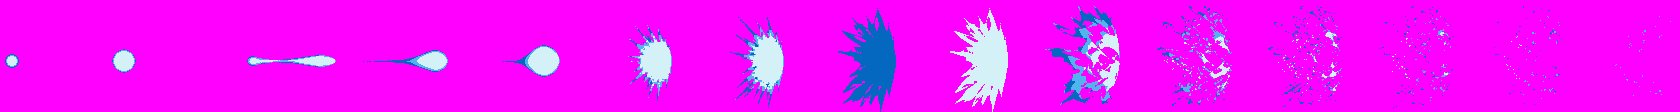

In [15]:
print('xmin = ' + str(xmin) + ' xmax = ' + str(xmax) + ' ymin = ' +
      str(ymin) +' ymax = ' + str(ymax))

print(count_colors(final))
cv2_imshow(final)
